In [76]:
import requests
page = requests.get("https://www.ulta.com/new-beauty-products")
print(page.status_code)
print(page.content)

200
b'<!DOCTYPE html>\r\n\r\n\t<html lang="en">\r\n\t<head>\r\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge" />\r\n\t\t<meta name="viewport" content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=0">\r\n\t\t<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\r\n\t\t<meta name="google-site-verification" content="0iJgVZRwJEqcwh-DfHO3TnKtFasUWdJmJbVBo2j8eg0" />\r\n\t\t<title>New Beauty Products | Ulta Beauty</title>\r\n\t\t<meta name="title" content="New Beauty Products | Ulta Beauty" />\r\n\t\t<meta name="description" content="Shop new beauty products at Ulta. See what&#39;s new in makeup, fragrance, skin care, nails, bath &amp; body, hair products and more." />\r\n\t\t<script type="text/javascript" src="/ulta/ruxitagentjs_ICA27SVfghjqrux_10203201027145855.js" data-dtconfig="app=6fe4664190660d01|agentId=3c17a084d7f33f43|ssc=1|featureHash=ICA27SVfghjqrux|doNotDetect=scr|vcv=2|rdnt=1|uxrgce=1|bp=2|cuc=11qvxopq|md=mdcc1=cakCookie,mdcc10=bgloba

In [77]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=0" name="viewport"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   <meta content="0iJgVZRwJEqcwh-DfHO3TnKtFasUWdJmJbVBo2j8eg0" name="google-site-verification"/>
   <title>
    New Beauty Products | Ulta Beauty
   </title>
   <meta content="New Beauty Products | Ulta Beauty" name="title"/>
   <meta content="Shop new beauty products at Ulta. See what's new in makeup, fragrance, skin care, nails, bath &amp; body, hair products and more." name="description"/>
   <script data-dtconfig="app=6fe4664190660d01|agentId=3c17a084d7f33f43|ssc=1|featureHash=ICA27SVfghjqrux|doNotDetect=scr|vcv=2|rdnt=1|uxrgce=1|bp=2|cuc=11qvxopq|md=mdcc1=cakCookie,mdcc10=bglobalPageData.profile.email,mdcc11=bglobalPageData.rewards.userType,mdcc12=bglobalPageData.rewards.platinumMemberType,mdcc14=bglobalPageData.or

In [78]:
list(soup.children)
list(soup.title)
print(soup.title.parent.name)
print(soup.p)

meta
<p class="prod-desc">
<a href="/red-lip-oil?productId=pimprod2020755">
				Red Lip Oil</a>
</p>


In [81]:
html = list(soup.children)[2]
list(html.children)
body = list(html.children)[3]
list(body.children)
p = list(body.children)[1]
p.get_text()

"\n\nskip to main content\n\n\nSearchFind a StoreEmail & Text SignupGift CardsSign InRewardsULTA Beauty LogoULTA Beauty Logo grey on white background\nGift GuideOpens in a new windowShop by BrandFeatured BrandsShop All BrandsNew ArrivalsMakeupNailsSkin CareHairTools & BrushesFragranceBath & BodyMenUlta Beauty CollectionGiftsSPARKED at Ulta BeautyOpens in a new windowMakeupFaceFoundationFace PowderConcealerColor CorrectingFace PrimerBB & CC CreamsBlushBronzerContouringHighlighterSetting Spray & PowderShine ControlMakeup RemoverLipsLipstickLip GlossLip LinerLip StainLip PlumpersLip Tints & BalmsSets & PalettesEyesEyeshadow PalettesMascaraEyelinerEyebrowsEyeshadowEye Primer & BaseEyelashesLash Primer & SerumsEye Makeup RemoverMakeup Brushes & ToolsBrush SetsMakeup BrushesSponges & ApplicatorsBrush CleanerBrow & Lash ToolsMirrorsBody MakeupMakeup Bags & CasesULTA CollectionTravel SizeGifts & Value SetsMakeup PalettesValue SetsFeaturedFoundation QuizFoundation Shade FinderMascara & Lash Qui

In [82]:
soup.find('p')
soup.find('head')

<head>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=0" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type">
<meta content="0iJgVZRwJEqcwh-DfHO3TnKtFasUWdJmJbVBo2j8eg0" name="google-site-verification"/>
<title>New Beauty Products | Ulta Beauty</title>
<meta content="New Beauty Products | Ulta Beauty" name="title"/>
<meta content="Shop new beauty products at Ulta. See what's new in makeup, fragrance, skin care, nails, bath &amp; body, hair products and more." name="description"/>
<script data-dtconfig="app=6fe4664190660d01|agentId=3c17a084d7f33f43|ssc=1|featureHash=ICA27SVfghjqrux|doNotDetect=scr|vcv=2|rdnt=1|uxrgce=1|bp=2|cuc=11qvxopq|md=mdcc1=cakCookie,mdcc10=bglobalPageData.profile.email,mdcc11=bglobalPageData.rewards.userType,mdcc12=bglobalPageData.rewards.platinumMemberType,mdcc14=bglobalPageData.order.total,mdcc15=a#js-cartpage ^rb div ^rb div ^rb div ^rb div ^

In [87]:
page = requests.get('https://www.ulta.com/new-beauty-products')
soup = BeautifulSoup(page.content, 'html.parser')
def parse_store(soup):
  product_list = []
  products = soup.find_all('div', {"class":"productQvContainer"})
  for product in products:
    entry = {}
    for h4 in product.find_all('h4', {"class":"prod-title"}):
      entry["brand"] = h4.text.replace("\n\n\t\t\t\t","").replace("\n","")
    for p in product.find_all('p', {"class":"prod-desc"}):
      entry["name"] = p.text.replace("\n\n\t\t\t\t","").replace("\n","")
    for span in product.find_all('span', {"class":"regPrice"}):
      entry["price"] = float(span.text.replace("\r\n\t\t\t\t\t\t$","").strip().split(" - ")[0].strip())
    product_list.append(entry)
  return product_list

things = parse_store(soup)
print(things)

[{'brand': 'Sweet & Shimmer', 'name': 'Red Lip Oil', 'price': 2.99}, {'brand': 'Morphe', 'name': 'Morphe X Nikita Eye Brush Set', 'price': 20.0}, {'brand': 'MAC', 'name': 'Limited Edition Boom Boom Wow Mini Advent Calendar', 'price': 99.0}, {'brand': 'Clinique', 'name': 'Jumbo Moisture Surge 72-Hour Auto-Replenishing Hydrator', 'price': 95.0}, {'brand': 'Morphe', 'name': 'Morphe X Nikita Artistry Palette', 'price': 30.0}, {'brand': 'Makeup Revolution', 'name': 'Revolution X Friends Cosmetic Bag', 'price': 12.0}, {'brand': 'Makeup Revolution', 'name': 'Revolution X Friends Vanilla Latte Lip Scrub', 'price': 8.0}, {'brand': 'Makeup Revolution', 'name': 'Revolution X Friends Open The Door 3D Shadow Palette', 'price': 25.0}, {'brand': 'Makeup Revolution', 'name': 'Revolution X Friends Pout Bomb', 'price': 8.0}, {'brand': 'Makeup Revolution', 'name': 'Revolution X Friends Handheld Mirror', 'price': 15.0}, {'brand': 'Makeup Revolution', 'name': 'Revolution X Friends Take A Drive Shadow Palet

In [88]:
import json
with open('ulta.json', 'w') as fout:
  json.dump(things, fout)

In [89]:
with open('ulta.json', 'r') as fd:
  things = json.load(fd)

print(things)

[{'brand': 'Sweet & Shimmer', 'name': 'Red Lip Oil', 'price': 2.99}, {'brand': 'Morphe', 'name': 'Morphe X Nikita Eye Brush Set', 'price': 20.0}, {'brand': 'MAC', 'name': 'Limited Edition Boom Boom Wow Mini Advent Calendar', 'price': 99.0}, {'brand': 'Clinique', 'name': 'Jumbo Moisture Surge 72-Hour Auto-Replenishing Hydrator', 'price': 95.0}, {'brand': 'Morphe', 'name': 'Morphe X Nikita Artistry Palette', 'price': 30.0}, {'brand': 'Makeup Revolution', 'name': 'Revolution X Friends Cosmetic Bag', 'price': 12.0}, {'brand': 'Makeup Revolution', 'name': 'Revolution X Friends Vanilla Latte Lip Scrub', 'price': 8.0}, {'brand': 'Makeup Revolution', 'name': 'Revolution X Friends Open The Door 3D Shadow Palette', 'price': 25.0}, {'brand': 'Makeup Revolution', 'name': 'Revolution X Friends Pout Bomb', 'price': 8.0}, {'brand': 'Makeup Revolution', 'name': 'Revolution X Friends Handheld Mirror', 'price': 15.0}, {'brand': 'Makeup Revolution', 'name': 'Revolution X Friends Take A Drive Shadow Palet

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [91]:
ulta_df = pd.DataFrame(things)
ulta_df

,brand,name,price
0,Sweet & Shimmer,Red Lip Oil,2.99
1,Morphe,Morphe X Nikita Eye Brush Set,20.00
2,MAC,Limited Edition Boom Boom Wow Mini Advent Cale...,99.00
3,Clinique,Jumbo Moisture Surge 72-Hour Auto-Replenishing...,95.00
4,Morphe,Morphe X Nikita Artistry Palette,30.00
...,...,...,...
91,Coco & Eve,Like A Virgin Deep Clean Scalp Scrub,36.90
92,Too Faced,Better Than Sex Faux Mink Falsie Lashes - Dram...,17.00
93,Too Faced,Better Than Sex Faux Mink Falsie Lashes - Natu...,17.00
94,Too Faced,Sleepover Survival Kit,25.00


In [92]:
brand_list = ulta_df['brand'].unique()

([<matplotlib.axis.YTick at 0x7fa422b2e810>,
 <a list of 11 Text yticklabel objects>)

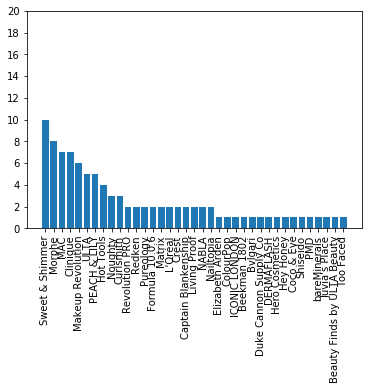

In [93]:
plt.bar(ulta_df['brand'].unique(), ulta_df['brand'].value_counts())
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 22, 2))

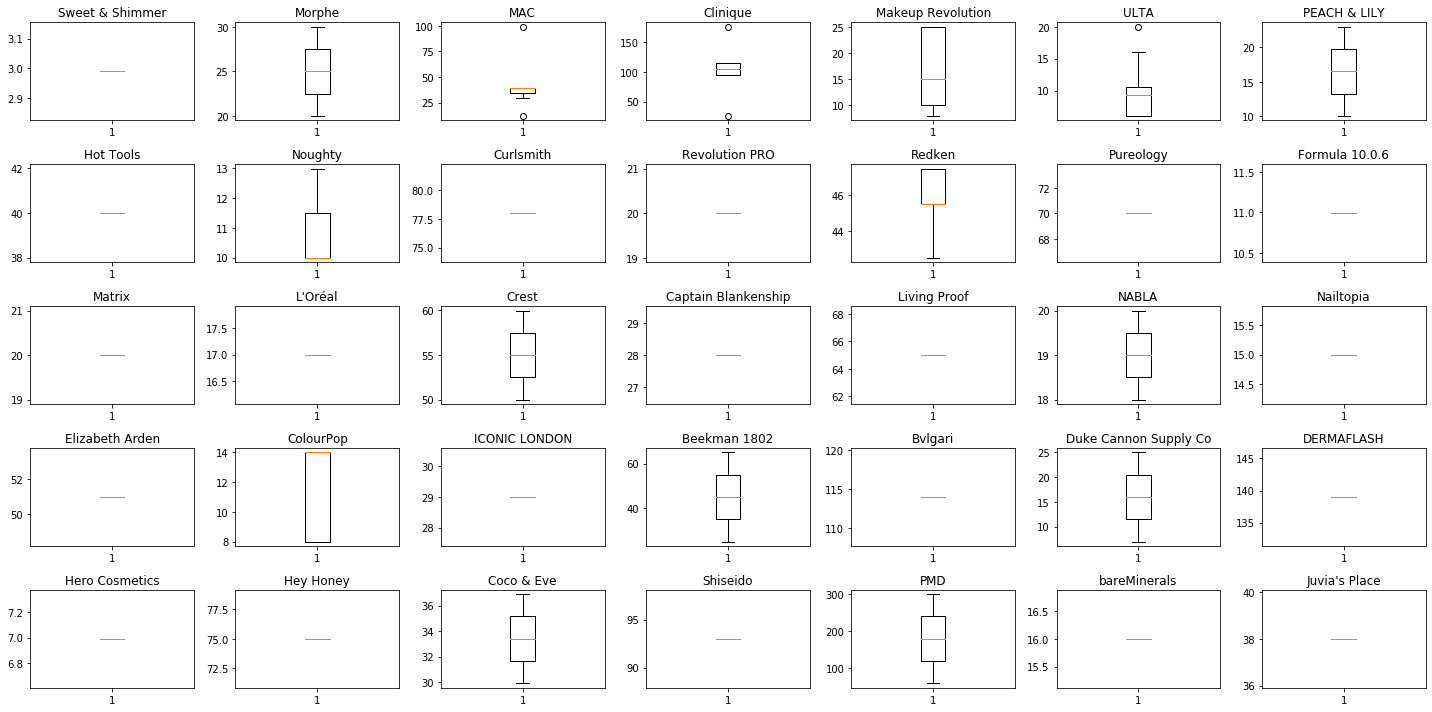

In [95]:
fig = plt.figure(figsize=(20,10))
for c,num in zip(brand_list, range(1, len(brand_list)-1)):
  df = ulta_df[ulta_df['brand']==c]
  ax = fig.add_subplot(5, 7, num)
  ax.boxplot(df['price'])
  ax.set_title(c)

plt.tight_layout()
plt.show()